In [1]:
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(
    0
)  # We manually set the seed for reproducible results, this is not required

# Challenge 4

Consider now a detector that, instead of counting interactions, it detects power (like, e.g., an antenna).
Other than that, the logic is as before. A particular measurement $p$ is to be considered a random variable
that follows Gaussian distribution whose mean $P_t$ is the sum of a background power $P_b$ and a signal power $P_s$.

$$
P = P_s + P_b
$$

As before, the background is known to be $P_b = 2 \times 10^{-20}$ W (from independent measurements), but
the signal strength is not known. The standard deviation of the distribution is related to the quality of the
measurement and is equal to $\sigma = 0.1 \times 10^{-20}$ W.
l.a.) 

1.a.) We perform an actual measurement of outcome:
$p = 2.7 \times 10^{-20}$ W.

Build the Neyman's confidence belt for this case. What is our estimation of $P_s$ and its uncertainty?

In [2]:
scale_factor = 1E21

measurement = 2.7E-20 * scale_factor
measurement_error = 0.1E-20 * scale_factor

background = 2.0E-20 * scale_factor


In [3]:
signal_estimation = measurement - background

print(f"signal_estimation = {signal_estimation:.2E}")

signal_estimation = 7.00E+00


In [4]:
from scipy.stats import norm
import scipy.integrate as integrate

N = 201
P = np.zeros((2 * N, 2 * N))
signals = np.linspace(-1 * signal_estimation, 3 * signal_estimation, 2 * N)

for i in range(2*N):
    P[i, :] = norm.pdf(signals, loc=signals[i], scale=measurement_error)


95.0% CI
interval: [6.06E-21, 8.01E-21]
mean value: 7.00E-21, uncertainty: 9.78E-22


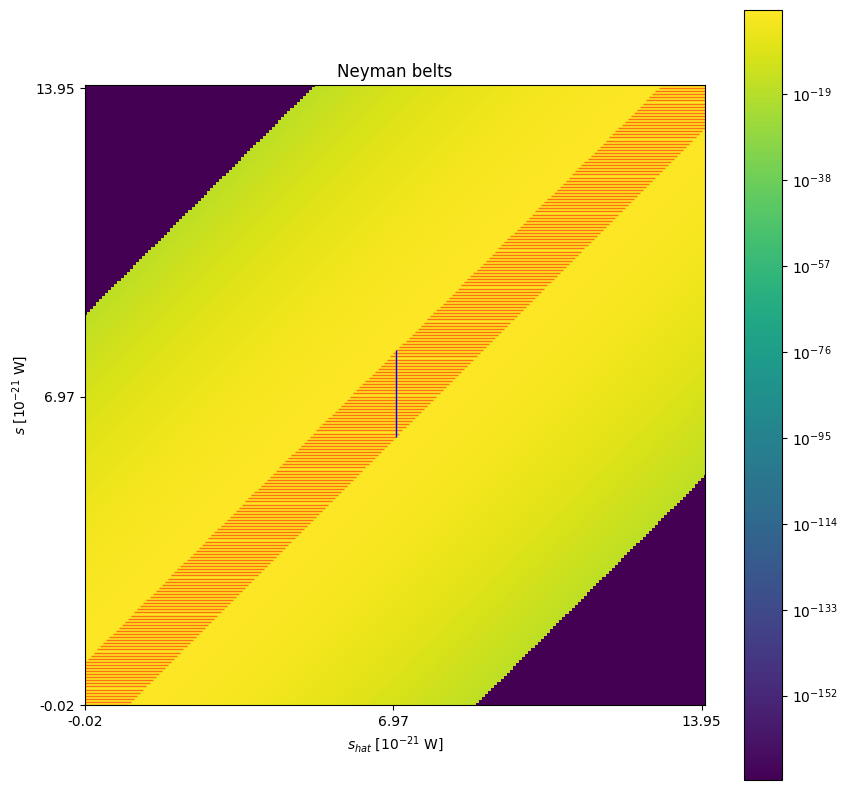

In [5]:
from matplotlib.colors import LogNorm

fig, ax = plt.subplots(figsize=(10, 10))

im = ax.imshow(P, origin="lower", cmap="viridis", norm=LogNorm())

ax.set_xlabel("$s_{hat}$ [$10^{-21}$ W]")
ax.set_ylabel("$s$ [$10^{-21}$ W]")
ax.set_title(f"Neyman belts")

# set x and y tick labels to values in "signals"
ticks = [x for x in np.arange(len(signals)) if x % 100 == 0]
ax.set_xticks(ticks)
ax.set_yticks(ticks)
labels = [f"{signals[i]:0.2f}" for i in ticks]
ax.set_xticklabels(labels)
ax.set_yticklabels(labels)

cbar = plt.colorbar(im)

# we constructed the vector so that the estimator is in the middle
signal_index = len(signals) // 2

vertical_min, vertical_max = (0, 0)

alpha = 0.32
for i in range(P.shape[0]):
    integration_x_delta = 1. / np.sum(P[i, :])
    for j in reversed(range(P.shape[0])):
        s = np.sum(P[i, j:]) * integration_x_delta
        if s > alpha / 2:
            if j == signal_index:
                vertical_min = i
            break
    high = j
    for j in range(P.shape[0]):
        s = np.sum(P[i, 0:j+1]) * integration_x_delta
        if s > alpha / 2:
            if j == signal_index:
                vertical_max = i
            break
    low = j
    plt.hlines(i, low, high, color="red", linewidth=1, alpha=0.5)

plt.vlines(signal_index, vertical_min, vertical_max, color="blue", linewidth=1)

print("95.0% CI")

print(
    f"interval: [{signals[vertical_min] / scale_factor:.2E}, {signals[vertical_max]/ scale_factor:.2E}]")
print(
    f"mean value: {np.mean(signals[vertical_min:vertical_max]/ scale_factor):.2E}, uncertainty: {(signals[vertical_max] - signals[vertical_min]) /  scale_factor / 2.:.2E}")

limits = np.array([0.25 * len(signals), 0.75 * len(signals)]) // 1
ax.set_xlim(limits)
ax.set_ylim(limits)

plt.show()
